In [2]:
from IPython.display import HTML

*ANYL 580: NLP for Data Analytics*

# **Lecture 6: Vector Semantics**

# Topics

- Semeval 2017
- Features redux
- Project #1
- Feature engineering
- Toolkits (so far)
- Vectorization
 - Frequency
 - One-hot encoding
 - TF-IDF
 - Weighted log odds
 - PMI
- Maxent (logistic regression) classifiers
- Learning and Optimization
 - Pipelines
 - Grid search
- Similarity
- Co-occurence and meaning
- Vector space models 
- Distributed representations (lead into next week - document models and word2vec feature models)

# Semeval 2017

![](../images/semeval-framework.jpg)

Stages of SemEval/Senseval evaluation workshops

- Expression of interest
- Time table
- Plan to collection and annotate data
- Gold files released to participants
- Participants run a test
- Organizers score answers and scores annoated and discussed at a workshop. Important to this process are shared, detailed papers and code for the purpose of advancing the state of the art and practice.

# Why four ground truth data sets?

<img src="../images/model-triple.png" width="400">

Image from: Bengfort, Bilbro, and Ojeda Applied Text Analysis with Python. 

Further insights from Wickham (2015) [Visualizing Statistical Models: Removing the Blindfold](http://had.co.nz/stat645/model-vis.pdf), and Kumar, McCann, Naughton, and Patel (2015) [Model Selection Management Systems: The Next Frontier of Advanced Analytics](http://pages.cs.wisc.edu/~arun/vision/SIGMODRecord15.pdf).

Note, we've been focused on the yellow box around feature engineering, but with the introduction of linear models in J&M chapter 5, we now have more choices in terms of algorithms -- both in the sort of model we can use (thus far, generative versus discriminative), but also in terms of the parameters of that model and how it's tuned to the particular data we are using. 

The organizers of semeval 2017 released four gold data sets with the understanding that a testdev data set would be used against, perhaps, hundreds of test runs for **hyperparameter tuning** a day. Thus, train and dev are used to tune features, testdev for hyperparameter tuning, and test for runs against new data. We'll talk about hyperparameters a bit today in the context of maxent.

That said, it's important that all data sets represent a common distribution. Errors in setting up evaluations have happened and will no doubt happen in the future. The statistical analyses you run to examine distributional properties of your data are important!

# Links to resources

- Task page: http://alt.qcri.org/semeval2017/task4/index.php?id=data-and-tools
- Test your skills!: https://competitions.codalab.org/competitions/15632
- Task 4 (Twitter sentiment) Description: https://www.aclweb.org/anthology/S17-2088.pdf
 - A: Given a tweet, decide whether it expresses POSITIVE, NEGATIVE or NEUTRAL sentiment.
 - B: Given a tweet and a topic, classify the sentiment conveyed towards that topic on a two-point scale: POSITIVE vs. NEGATIVE.
 - C: Given a tweet and a topic, classify the sentiment conveyed in the tweet towards that topic on a five-point scale: STRONGLYPOSITIVE, WEAKLYPOSITIVE, NEUTRAL, WEAKLYNEGATIVE, and STRONGLYNEGATIVE.
 - D: Given a set of tweets about a topic, estimate the distribution of tweets across the POSITIVE and NEGATIVE classes.
 - E: Given a set of tweets about a topic, estimate the distribution of tweets across the five classes: STRONGLYPOSITIVE, WEAKLYPOSITIVE, NEUTRAL, WEAKLYNEGATIVE, and STRONGLYNEGATIVE.
 
 For both English and Arabic.
 
 You competed in Task 4A!

# How did the teams do?
<img src="../images/semeval-scores.png" width="400">

For English the best ranking teams were BB twtr and DataStories, both achieving a macroaverage recall of 0.681. Both top teams used deep learning.

Three of the top-10 scoring teams (INGEOTEC, SiTAKA, and UCSC-NLP) used SVM classifiers instead, with various surface, lexical, semantic, and dense word embedding features. The use of ensembles clearly stood out, with five of the top-10 scoring systems (BB twtr, LIA, NNEMBs, Tweester, and INGEOTEC) using ensembles, hybrid, stacking or some kind of mix of learning methods.

Can you see why AVEREC is useful? Note that a few teams did not beat the baseline F1 score or accuracy score. How did you do?

# Some participant papers

- [NILC-USP at SemEval-2017 Task 4: A Multi-view Ensemble for Twitter Sentiment Analysis](https://pdfs.semanticscholar.org/f649/33e626330997feb9ff3c1484da93127b88ab.pdf)  
 - https://github.com/edilsonacjr/semeval2017
- [TwiSE at SemEval-2016 Task 4: Twitter Sentiment Classification](https://arxiv.org/pdf/1606.04351.pdf)
- https://github.com/balikasg/SemEval2016-Twitter_Sentiment_Evaluation
- 🎓 [Minions at SemEval-2016 Task 4: or how to build a sentiment analyzer using off-the-shelf resources?](https://www.aclweb.org/anthology/S16-1038.pdf)

- The first team used scikit-learn Linear Regression and Support Vector machines with three types of text representation:  1) bag-of-words model weighted by tf-idf; 2) average of the word embedding vectors of the words in the tweet and, 3) averaged weighted word embeddings of all words in the tweet with tf-idf weights. They supplemented features with sentiment lexicons.


- Feature engineering of ngrams and sentiment lexicons for unigrams and bigrams. Bag-of-words with hashing representation. They used Logistic Regression and SVMs as base models and in an ensemble learning approach. They first generated a set of models that performed well as individual models, and then selected a subset of models that generate diverse outputs and combined them using an ensemble learning step with the intent to lower generalization error.


- The third is a paper written by a team in a Master's program in Computational Linguistics in Romania. They used public APIs and tools including Alchemy API, sentiment140.com, and NLTK. 

# Project #1 Class Leaderboard (AveRec)


Section 1:
- <font color = "red">Pho75</font> **.752**
- Wonder 4 **.544**
- <font color = "red">Amazing Four</font> **.543**
- Bangkok 54 **.537**
- Insight X **.517**
- 3+1 **.516**
- Beautiful Soup **.508**
- Dance Squad **.469**

Section 2:
- Group Name Taken **.584**
- <font color = "red">404 not found</font> **.576**
- The Word Nerd **.568**
- NLP #1 **.564**
- I.O.S. **.560**
- Hotdog **.542**
- <font color = "red">Asian Fusion 66</font> **.507**
- TPS **.499
- Be Better **.379**
- Sailor Moon **.349**


# Feature-based models
- What features do I use? (selection)
- How do I weigh features? 
- How do I combine weights to make a prediction?

The idea of **feature selection** is to identify properties of a document that will likely contribute to classification as positive, negative, and neutral.

Feature selection is useful for reducing the dimensionality of sample data and take advantage of words and other features that we know vary with respect to the task at hand.

But we still need to quantify these features in such a way that we can distinguish the relative importance of words (again with respect to the task at hand). **Feature extraction** is concerned with  quantification and also further dimensionality reduction.

And on top of this, we may need to **weight features, normalize, and regularize** so that we highlight the aspects we care about and also so that we avoid over-fitting to the sample data.

# Feature Selection for Sentiment
- Case (capitalization)
- Previous word
- Stemming, lemmatization
- Unigrams, bigrams
- Part-of-speech
- Ontological information (e.g., part-whole relationships)
- Lexical and syntactic features (e.g., adjectives, adverbs, terms near subjective expressions)

In [152]:
import nltk
import IPython
import os
from collections import Counter
from nltk.tree import Tree
from IPython.display import Image, display
from IPython.display import Image, display
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame

In [153]:
def jupyter_draw_nltk_tree(tree):
    cf = CanvasFrame()
    tc = TreeWidget(cf.canvas(), tree)
    tc['node_font'] = 'arial 13 bold'
    tc['leaf_font'] = 'arial 14'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#3F8F57'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 10, 10)
    cf.print_to_file('tmp_tree_output.ps')
    cf.destroy()
    os.system('convert tmp_tree_output.ps tmp_tree_output.png')
    display(Image(filename='tmp_tree_output.png'))
    os.system('rm tmp_tree_output.ps tmp_tree_output.png')


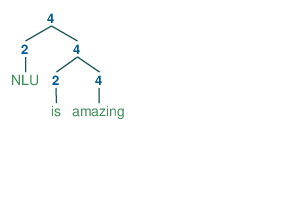

In [160]:
# Tree - scope example

# They said NLU is amazing
# Going to class is 'meh', but NLU is amazing

tree = Tree.fromstring("""(4 (2 NLU) (4 (2 is) (4 amazing)))""")
jupyter_draw_nltk_tree(tree)

# Hand-built features

- Lexicon-derived features
- Negation
- Modal adverbs:
 - "It is **quite possibly** a masterpiece."
 - "It is **totally amazing**"
- Thwarted expectations:
 - “Many consider the movie bewildering, boring, slow-moving or annoying.”
 - “It was hailed as a brilliant, unprecedented artistic achievement worthy of multiple Oscars.”
- Non-literal language:
 - “Not exactly a masterpiece.”
 - “Like 50 hours long.”
 - “The best movie in the history of the universe.”

Examples from Chris Potts: http://web.stanford.edu/class/cs224u/materials/cs224u-2019-sentiment.pdf

There is much more here on sentiment treebanks and using syntax for sentiment analysis.

In [159]:
# This example from https://scikit-learn.org/stable/modules/feature_selection.html

from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

From: https://scikit-learn.org/stable/modules/feature_selection.html

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by

so we can select using the threshold .8 * (1 - .8):

# Assessing feature functions

- sklearn.feature_selection offers functions to assess how much information your feature functions contain with respect to your labels

- But recall, features are not usually independent with respect to the class

- Adding multiple feature *types (e.g., words and morphemes)* can lead to stronger correlations between features

- Consider more holistic assessment methods: systematically removing or disrupting features in the context of a full model and comparing performance before and after.

# Feature Extraction V1
<img src="../images/text-vectorization.png" width="400">

Hopefully, during the course of thinking through a bag-of-words model for your project, you had the insight to add additional lexical resources to your model like this. While thus far we've simply thought of text vectorization as turning words into something we can compute -- there is more to it than this.

# Feature Extraction - Deeper Dive
<img src="../images/feature-extraction.png" width="400">

Image from: A Study of Feature Extraction techniques for Sentiment Analysis. https://arxiv.org/pdf/1906.01573.pdf

In this diagram, there are three stage:
1. Pre-processing
2. Feature Extraction
3. Classification

Between stage 1 and stage 2 is **selecting features** where you may be iteratively removing noise or patterns during model tuning. 

From stage 2 to stage 3 is **feature extraction** and **weighting**. Feature extraction is the step where high dimensional features are mapped onto a set of low dimensional potential features for computing (classification). Weighting methods such as TF-IDF are used for ranking the relative importance of features.

Finally, after stage 3 there is a consideration of fitting an algorithm and iterating over parameters and hyper-parameters.

# Weights (parameters)

![](../images/term-weights.png)

Image from: J&M Chapter 5

We'll go over Maxent (Logistic Regression) a bit later, but for now let's appreciate the view that this algorithms tunes by weighting terms for relative importance with respect to the task.

The algorithm internal parameters (w) and bias term (b) in logistic regression are **parameters** selected in training.

**Hyperparameters**, on the other hand, are configurations external to the model that are used in a final tuning stage. We'll talk briefly about these in grid search, below.

# Toolkits
![](../images/toolkits.png)

All of these steps can be accomplished with the toolkits we're using -- though often they are used in combination. I will show you some examples of this in a bit.

We've already experimented with two out of three of these toolkits and will add one more for next week when we move to topic modeling.

![](../images/compare-toolkits.png)

From: https://medium.com/activewizards-machine-learning-company/comparison-of-top-6-python-nlp-libraries-c4ce160237eb

Some other notes:

| NLTK | Scikit-Learn | Gensim |
|------|------|--------|
| Big dependency | Not designed for text but with some NLP conveniences | Can serialize dictionaries and references in matrix market format (useful for multiple platforms) |
| Designed for teaching | | |

Until now, we've touched on two different libraries for bag-of-words representation: NLTK and Scikit-Learn. Today we'll introduce a third and talk about some of the differences.

While we're at it, we'll take a look at vectorization and feature extraction across all three toolkits.

# Documents as Vectors

![](../images/doc-vector.png)

For this section on vectorization using NLTK, Scikit-learn, and Gensim, code examples and images are drawn from: https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

Imagine the 1 dimensional vector as your vocabulary. The corpus has a length equivalent to the vocabulary. 

So how best to represent a document as a vector? 

# Frequency
![](../images/token-frequencies.png)

In fact, the *simplest encoding of semantic space is vocabulary*. 

Thus, far we've used this insight in terms of the **bag-of-words** model. Documents that share many similar words are similar, in some sense. The BOW model represents text as a bag (or multi-set) of words after text pre-processing. From BOW, we can derive term frequencies for each word. 

In this representation, each document is represented as a set of tokens and the value for each word position in the vector as its count. This is using a straight count. You could also normalize each count for the length of a document.

In [113]:
corpus = [
    'Microsoft On hold with support for 52 minutes now. Come on',
    'Beyond frustrated with my Xbox360 right now and that as of June Microsoft does not support it. Gotta find someone else to fix the drive',
    'Microsoft Heard you are a software company. Why then is most of your software so bad that it has to be replaced by 3rd party apps?'
]

corpus_alt = [
    "The elephant sneezed at the sight of potatoes.",
    "Bats can see via echolocation. See the bat sneeze!",
    "Wondering, she opened the door to the studio."
]

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
import string

#def tokenize(text):
#    stem = nltk.stem.SnowballStemmer('english')
#    text = text.lower()

#    for token in nltk.word_tokenize(text):
#        if token in string.punctuation: continue
#        yield stem.stem(token)


# the 'yield' statement indicates that this is a generator function
# https://coreyms.com/development/python-generators-how-to-use-them-and-the-benefits-you-receive
def tokenize(text):
    wnl = WordNetLemmatizer()
    text = text.lower()
    
    for token in nltk.word_tokenize(text):
        if token in string.punctuation: continue
        yield wnl.lemmatize(token)

In [21]:
tokens = map(tokenize, corpus)
for token in tokens:
    print(list(token))

['microsoft', 'on', 'hold', 'with', 'support', 'for', '52', 'minute', 'now', 'come', 'on']
['beyond', 'frustrated', 'with', 'my', 'xbox360', 'right', 'now', 'and', 'that', 'a', 'of', 'june', 'microsoft', 'doe', 'not', 'support', 'it', 'got', 'ta', 'find', 'someone', 'else', 'to', 'fix', 'the', 'drive']
['microsoft', 'heard', 'you', 'are', 'a', 'software', 'company', 'why', 'then', 'is', 'most', 'of', 'your', 'software', 'so', 'bad', 'that', 'it', 'ha', 'to', 'be', 'replaced', 'by', '3rd', 'party', 'apps']


In [22]:
# This is the data structure the NLTK SentimentAnalyzer used for our Naive Bayes example

from collections import defaultdict

def vectorize(doc):
    # set feature as 0
    features = defaultdict(int)
    for token in tokenize(doc):
        features[token] +=1
    return features

In [23]:
# creates an iterable of vectorized documents
# NLTK uses features in a dict object where the key is the name of the feature and the value 
# boolean or numeric.
vectors = map(vectorize, corpus)

for vector in vectors:
    print(vector)

defaultdict(<class 'int'>, {'microsoft': 1, 'on': 2, 'hold': 1, 'with': 1, 'support': 1, 'for': 1, '52': 1, 'minute': 1, 'now': 1, 'come': 1})
defaultdict(<class 'int'>, {'beyond': 1, 'frustrated': 1, 'with': 1, 'my': 1, 'xbox360': 1, 'right': 1, 'now': 1, 'and': 1, 'that': 1, 'a': 1, 'of': 1, 'june': 1, 'microsoft': 1, 'doe': 1, 'not': 1, 'support': 1, 'it': 1, 'got': 1, 'ta': 1, 'find': 1, 'someone': 1, 'else': 1, 'to': 1, 'fix': 1, 'the': 1, 'drive': 1})
defaultdict(<class 'int'>, {'microsoft': 1, 'heard': 1, 'you': 1, 'are': 1, 'a': 1, 'software': 2, 'company': 1, 'why': 1, 'then': 1, 'is': 1, 'most': 1, 'of': 1, 'your': 1, 'so': 1, 'bad': 1, 'that': 1, 'it': 1, 'ha': 1, 'to': 1, 'be': 1, 'replaced': 1, 'by': 1, '3rd': 1, 'party': 1, 'apps': 1})


In [24]:
# This is what we used for V2 of Naive Bayes using scikit-learn (and logistic regresion v1)
# The fit method expects an iterable or list of strings and creates a dictionary of the vocabulary
# of the corpus.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

In [25]:
print(vectorizer.vocabulary_)

{'microsoft': 26, 'on': 33, 'hold': 22, 'with': 46, 'support': 40, 'for': 17, '52': 1, 'minutes': 27, 'now': 31, 'come': 10, 'beyond': 8, 'frustrated': 18, 'my': 29, 'xbox360': 47, 'right': 36, 'and': 2, 'that': 41, 'as': 5, 'of': 32, 'june': 25, 'does': 12, 'not': 30, 'it': 24, 'gotta': 19, 'find': 15, 'someone': 39, 'else': 14, 'to': 44, 'fix': 16, 'the': 42, 'drive': 13, 'heard': 21, 'you': 48, 'are': 4, 'software': 38, 'company': 11, 'why': 45, 'then': 43, 'is': 23, 'most': 28, 'your': 49, 'so': 37, 'bad': 6, 'has': 20, 'be': 7, 'replaced': 35, 'by': 9, '3rd': 0, 'party': 34, 'apps': 3}


In [26]:
# This is a sparse array where the index tuple is the doc ID and token ID from the dictionary
# and the value the count

for vector in vectors:
    print(vector)

  (0, 26)	1
  (0, 33)	2
  (0, 22)	1
  (0, 46)	1
  (0, 40)	1
  (0, 17)	1
  (0, 1)	1
  (0, 27)	1
  (0, 31)	1
  (0, 10)	1
  (0, 26)	1
  (0, 46)	1
  (0, 40)	1
  (0, 31)	1
  (0, 8)	1
  (0, 18)	1
  (0, 29)	1
  (0, 47)	1
  (0, 36)	1
  (0, 2)	1
  (0, 41)	1
  (0, 5)	1
  (0, 32)	1
  (0, 25)	1
  (0, 12)	1
  (0, 30)	1
  (0, 24)	1
  (0, 19)	1
  (0, 15)	1
  (0, 39)	1
  (0, 14)	1
  (0, 44)	1
  (0, 16)	1
  (0, 42)	1
  (0, 13)	1
  (0, 26)	1
  (0, 41)	1
  (0, 32)	1
  (0, 24)	1
  (0, 44)	1
  (0, 21)	1
  (0, 48)	1
  (0, 4)	1
  (0, 38)	2
  (0, 11)	1
  (0, 45)	1
  (0, 43)	1
  (0, 23)	1
  (0, 28)	1
  (0, 49)	1
  (0, 37)	1
  (0, 6)	1
  (0, 20)	1
  (0, 7)	1
  (0, 35)	1
  (0, 9)	1
  (0, 0)	1
  (0, 34)	1
  (0, 3)	1


In [27]:
# We'll be using Gensim next week. It's frequency encoder is doc2bow.
# It requires pre-tokenized documents
# To use doc2bow, we need a Gensim Dictionary that maps tokens to indices

import gensim

tokenized_corpus = [list(tokenize(doc)) for doc in corpus]
id2word = gensim.corpora.Dictionary(tokenized_corpus)

for doc in tokenized_corpus:
    print(id2word.doc2bow(doc))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1)]
[(4, 1), (6, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)]
[(4, 1), (10, 1), (20, 1), (24, 1), (28, 1), (30, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1)]


## One Hot Encoding

![](../images/one-hot.png)

In this representation, word representations are normalized in terms of frequency of occurence. And because values are 0-1, this is a useful representation for neural networks.

In [28]:
# NLTK one-hot representation
# From our NLTK naive bayes example, recall that training_features[0] was ({'microsoft': True,'may': True},...},positive)
# We actually used a one-hot representation.

def vectorize(doc):
    return {
        token: True
        for token in doc
    }

vectors = map(vectorize, corpus)

In [29]:
for vector in vectors:
    print(vector)

{'M': True, 'i': True, 'c': True, 'r': True, 'o': True, 's': True, 'f': True, 't': True, ' ': True, 'O': True, 'n': True, 'h': True, 'l': True, 'd': True, 'w': True, 'u': True, 'p': True, '5': True, '2': True, 'm': True, 'e': True, '.': True, 'C': True}
{'B': True, 'e': True, 'y': True, 'o': True, 'n': True, 'd': True, ' ': True, 'f': True, 'r': True, 'u': True, 's': True, 't': True, 'a': True, 'w': True, 'i': True, 'h': True, 'm': True, 'X': True, 'b': True, 'x': True, '3': True, '6': True, '0': True, 'g': True, 'J': True, 'M': True, 'c': True, 'p': True, '.': True, 'G': True, 'l': True, 'v': True}
{'M': True, 'i': True, 'c': True, 'r': True, 'o': True, 's': True, 'f': True, 't': True, ' ': True, 'H': True, 'e': True, 'a': True, 'd': True, 'y': True, 'u': True, 'w': True, 'm': True, 'p': True, 'n': True, '.': True, 'W': True, 'h': True, 'b': True, 'l': True, '3': True, '?': True}


In [46]:
# The only difference to the scikit-learn frequency based representation is 'binary=True'

vectorizer = CountVectorizer(binary=True)
vectors = vectorizer.fit_transform(corpus)

In [47]:
for vector in vectors:
    print(vector)

  (0, 26)	1
  (0, 33)	1
  (0, 22)	1
  (0, 46)	1
  (0, 40)	1
  (0, 17)	1
  (0, 1)	1
  (0, 27)	1
  (0, 31)	1
  (0, 10)	1
  (0, 26)	1
  (0, 46)	1
  (0, 40)	1
  (0, 31)	1
  (0, 8)	1
  (0, 18)	1
  (0, 29)	1
  (0, 47)	1
  (0, 36)	1
  (0, 2)	1
  (0, 41)	1
  (0, 5)	1
  (0, 32)	1
  (0, 25)	1
  (0, 12)	1
  (0, 30)	1
  (0, 24)	1
  (0, 19)	1
  (0, 15)	1
  (0, 39)	1
  (0, 14)	1
  (0, 44)	1
  (0, 16)	1
  (0, 42)	1
  (0, 13)	1
  (0, 26)	1
  (0, 41)	1
  (0, 32)	1
  (0, 24)	1
  (0, 44)	1
  (0, 21)	1
  (0, 48)	1
  (0, 4)	1
  (0, 38)	1
  (0, 11)	1
  (0, 45)	1
  (0, 43)	1
  (0, 23)	1
  (0, 28)	1
  (0, 49)	1
  (0, 37)	1
  (0, 6)	1
  (0, 20)	1
  (0, 7)	1
  (0, 35)	1
  (0, 9)	1
  (0, 0)	1
  (0, 34)	1
  (0, 3)	1


In [116]:
# Gensim does not have a one-hot encoder.
# doc2bow returns a list of tuples https://radimrehurek.com/gensim/corpora/dictionary.html
# We can use the dictionary to get a one-hot encoding vector.
# To get vectors, an inner list comprehension converts the list of tuples returned from the doc2bow method 
# into a list of (token_id, 1) tuples and the outer comprehension applies that converter to all documents 
# in the corpus. 
# Note that we don't get word similarity, but doc similarity.

import numpy as np

tokenized_corpus  = [list(tokenize(doc)) for doc in corpus]
id2word = gensim.corpora.Dictionary(tokenized_corpus)
vectors  = np.array([
    [(token[0], 1) for token in id2word.doc2bow(doc)]
    for doc in tokenized_corpus
    ])

In [117]:
for vector in vectors:
    print(vector)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
[(4, 1), (6, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)]
[(4, 1), (10, 1), (20, 1), (24, 1), (28, 1), (30, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]


## TF-IDF

![](../images/tf-idf.png)

**Term-Frequency Inverse Document Frequency** considers the relative frequency of terms in a document against term frequencies in other documents. 

*The basic idea is that documents that are similar share terms that are common between them but more rare in other documents.*

TF–IDF is computed for each term, such that the relevance of a token to a document is measured by the scaled frequency of the appearance of the term in the document, normalized by the inverse of the scaled frequency of the term in the entire corpus.

$ tfidf( t, d, D ) = tf( t, d ) \times idf( t, D ) $

Where `t` denotes the terms; `d` denotes each document; `D` denotes the collection of documents.

The first part (tf) is: 
$ tf(t,d)  $

- <font color=red>the number of times each word appeared in each document</font>

The second part (idf) is: 

$ idf( t, D ) = log \frac{ \text{| } D \text{ |} }{ 1 + \text{| } \{ d \in D : t \in d \} \text{ |} } $


- `D` is the document space, also equal to ${ d_{1}, d_{2}, \dots, d_{n} }$ where n is the number of documents in the collection. 
- The denominator : $\text{| } \{ d \in D : t \in d \} \text{ |}$ is <font color=red>the total number of times in which term t appeared in all documents d</font> (the ${d \in D}$ restricts the document to be in the current document space). Finally, '1' is added so as not to divide by zero.

In [132]:
# NLTK TextCollection does a number of nifty things such as concordancing, collocations, and tfidf.
# The function below yields a dictionary whose keys are terms and whose values are the TF–IDF 
# score for the term in that particular document.

from nltk.text import TextCollection

def vectorize(corpus):
    corpus_tokenized = [list(tokenize(doc)) for doc in corpus]
    texts  = TextCollection(corpus_tokenized)
    
    for doc in corpus_tokenized:
        return {
            term: texts.tf_idf(term, doc)
            for term in doc
        }

In [133]:
# Just the first doc here
vectors = vectorize(corpus)
for k, v in vectors.items():
    print(k, v)

microsoft 0.0
on 0.19974768884874725
hold 0.09987384442437362
with 0.036860464373469494
support 0.036860464373469494
for 0.09987384442437362
52 0.09987384442437362
minute 0.09987384442437362
now 0.036860464373469494
come 0.09987384442437362


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
corpus_tfidf = tfidf.fit_transform(corpus)
print(corpus_tfidf)

  (0, 10)	0.3003663221930836
  (0, 31)	0.22843633010592582
  (0, 27)	0.3003663221930836
  (0, 1)	0.3003663221930836
  (0, 17)	0.3003663221930836
  (0, 40)	0.22843633010592582
  (0, 46)	0.22843633010592582
  (0, 22)	0.3003663221930836
  (0, 33)	0.6007326443861672
  (0, 26)	0.17740118853326658
  (1, 13)	0.21618085413503882
  (1, 42)	0.21618085413503882
  (1, 16)	0.21618085413503882
  (1, 44)	0.16441111172918924
  (1, 14)	0.21618085413503882
  (1, 39)	0.21618085413503882
  (1, 15)	0.21618085413503882
  (1, 19)	0.21618085413503882
  (1, 24)	0.16441111172918924
  (1, 30)	0.21618085413503882
  (1, 12)	0.21618085413503882
  (1, 25)	0.21618085413503882
  (1, 32)	0.16441111172918924
  (1, 5)	0.21618085413503882
  (1, 41)	0.16441111172918924
  :	:
  (1, 26)	0.12767989494188275
  (2, 3)	0.20136412968926334
  (2, 34)	0.20136412968926334
  (2, 0)	0.20136412968926334
  (2, 9)	0.20136412968926334
  (2, 35)	0.20136412968926334
  (2, 7)	0.20136412968926334
  (2, 20)	0.20136412968926334
  (2, 6)	0.20136

In [121]:
corpus_tokenized  = [list(tokenize(doc)) for doc in corpus]
lexicon = gensim.corpora.Dictionary(corpus_tokenized)
tfidf   = gensim.models.TfidfModel(dictionary=lexicon, normalize=True)
vectors = [tfidf[lexicon.doc2bow(doc)] for doc in corpus_tokenized]

for vector in vectors:
    print(vector)

[(0, 0.3260142684050715), (1, 0.3260142684050715), (2, 0.3260142684050715), (3, 0.3260142684050715), (5, 0.3260142684050715), (6, 0.12032216637948073), (7, 0.652028536810143), (8, 0.12032216637948073), (9, 0.12032216637948073)]
[(6, 0.08677473962806087), (8, 0.08677473962806087), (9, 0.08677473962806087), (10, 0.08677473962806087), (11, 0.23511713682631347), (12, 0.23511713682631347), (13, 0.23511713682631347), (14, 0.23511713682631347), (15, 0.23511713682631347), (16, 0.23511713682631347), (17, 0.23511713682631347), (18, 0.23511713682631347), (19, 0.23511713682631347), (20, 0.08677473962806087), (21, 0.23511713682631347), (22, 0.23511713682631347), (23, 0.23511713682631347), (24, 0.08677473962806087), (25, 0.23511713682631347), (26, 0.23511713682631347), (27, 0.23511713682631347), (28, 0.08677473962806087), (29, 0.23511713682631347), (30, 0.08677473962806087), (31, 0.23511713682631347)]
[(10, 0.0774956491527985), (20, 0.0774956491527985), (24, 0.0774956491527985), (28, 0.0774956491527

# What TF-IDF does for us

- Frequent terms contribute most to a document vector’s direction, but not all terms are relevant (“the”, “a”, ...).

- It separates *important* terms from *frequent*, but irrelevant terms in the collection.

# Maxent Classifiers

The goal is to train a classifier that can make a binary decision about the class of a new input observation. We use **multinomial logistic regression** when there are more than two categories.

![](../images/maxent-formula.png)


![](../images/maxent-score.png)



1. For each $f_i(x)$ in a set of N features, determine if $f_i(x)$ should be 1 or 0.
![](../images/maxent-feature.png)
2. Multiply each $f_i(x)$ with the associated weight $w_i(d)$, which depends on the decision d being evaluated.
3. Add up all of the weight*feature pairs: $sum_d = \sum_{i=1}^{N} w_i(d)*f_i(x)$
4. Exponentize (is that word?): $numerator_d = \exp(sum_d) $
5. Divide the sum by a number that will range the score between 0 and 1, and such that the sum of scores across all decisions is 1. 

It turns out that this is the sum of the numerators for every possible decision d: $denominator = \sum_{d} \exp(\sum_{i=1}^{N} w_i(d)*f_i(x))$


# 1. Feature representation (with weights w)

- Define features over data points
- A feature doesn't have to be a word but might refer to words (e.g., word ends in -ing)

- Spam/notspam example:
 - w1(spam) (Email contains spelling/grammatical errors) .5
 - w2(spam)(Email asks for money to be transferred) .2
 - w3(spam) (Email mentions account holder’s name) -.5
 - w1(notspam) (Email contains spelling/grammatical errors) -.2
  - w2(notspam)(Email asks for money to be transferred) 0
 - w3(notspam) (Email mentions account holder’s name) 1

## 2. Classification function
![](../images/sigmoid.png)

The multinominal logistic classifier uses a **generalization of the sigmoid**, called the **softmax** function, to compute the probability p(y = c|x). The softmax function takes a vector z = [z1,z2,...,zk] of k arbitrary values and maps them to a probability distribution, with each value in the range (0,1), and all the values summing to 1.

In [4]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/o6HrH2EMD-w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
# 3. Objective function for learning (cross entropy loss)

- The goal is to set <font color=red>parameters</font> weights $w$ and bias $b$
- We need a cost function to measure how close the current label is to the gold label
 - Cross-entropy loss. Small if close to correct, bigger if the model is confused
 - Log probability so we get a score 0 - 1

# 4. Algorithm for optimizing the function (stochastic gradient descent)
- Iteratively update weights to minimize loss
 - Stochastic gradient descent algorithm
 - Figures out out in which direction  the function’s slope is rising the most steeply, and moving in the opposite direction.
 - The magnitude of the amount to move is weighted by a learning rate.

In [5]:
# If your eyes bled in this part of J&M, this video is helpful
# Also see, http://ruder.io/optimizing-gradient-descent/

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vMh0zPT0tLI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Regularization

Regularization is a way of finding a good **bias-variance tradeoff** by tuning the complexity of the model. 
- collinearity (high correlation among features)
- filter out noise from data
- prevent overfitting

The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.

- L2 regularization (Euclidian distance)
- L1 regularization (Manhatten distance)

In [6]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NGf0voTMlcs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Maxent vs Naive Bayes

- Naive Bayes
 - Tries to **generate** observed data randomly
 - Trained to maximize joint likelihood of data and classes: P(c,d)
 - Features assumed to supply **independent evidence**
 - Feature weights can be set independently
 - Trained to maximize joint likelihood of data and classes: P(c,d)
 - NB tends to overcount evidence
- MaxEnt
 - Tries to directly estimate the posterior probability. (**discriminates** between different outputs)
 - Trained to maximize conditional likelihood of classes: P(c|d)
 - Feature weights take **feature dependence** into account
 - Feature weights must be mutually estimated
 - Trained to maximize conditional likelihood of classes: P(c|d)
 - Weights of features better model expectations

# Scikit-learn

- Designed for ML in a repeatable fashion
- Allows us to combine elements of all three toolkits
- Allows us to "union" pre-processors and vectorizers
- Supports iterative tuning by adjusting parameters and hyperparameters 

![](../images/text-pipeline.png)

Hyperparameters might include:
- learning rate
- regularization (L1, L2, c)
- and more via https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
 - For small values of C (1/Lambda), we increase the regularization strength which will create simple models which may underfit the data. For large values of C, we allow more  model complexity and may overfit the data.

In [ ]:
# Base Estimator
from sklearn.base import BaseEstimator
class Estimator(BaseEstimator):

def fit(self, X, y=None):
"""
Accept input data, X, and optional target data, y. Returns self.
"""
return self
def predict(self, X):
"""
Accept input data, X and return a vector of predictions for each row.
"""
return yhat

In [ ]:
# An Estimator is an interface to a learner. It has two methods: fit and predict. 
# The training data is expected to be matrix like (Pandas or 2D numpy array).
# Note that Estimator objects have parameters that describe the fitting process.

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
model.fit(documents, labels)

In [ ]:
# TranformerMixin

from sklearn.base import TransformerMixin
class Transfomer(BaseEstimator, TransformerMixin):
def fit(self, X, y=None):
"""
Learn how to transform data based on input data, X.
"""
return self
def transform(self, X):
"""
Transform X into a new dataset, Xprime and return it.
"""
return Xprime

A **Transformer** is a special type of Estimator that creates a new data set from an old one based on rules it has learned from fitting. It takes a dataset and returns a new dataset with new values based on transformation. Basically, it supports **feature extraction**.

In [ ]:
# Pre-processing using a Transformer
# Example from https://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html
import string

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

from sklearn.base import BaseEstimator, TransformerMixin


class NLTKPreprocessor(BaseEstimator, TransformerMixin):

    def __init__(self, stopwords=None, punct=None,
                 lower=True, strip=True):
        self.lower      = lower
        self.strip      = strip
        self.stopwords  = stopwords or set(sw.words('english'))
        self.punct      = punct or set(string.punctuation)
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def inverse_transform(self, X):
        return [" ".join(doc) for doc in X]

    def transform(self, X):
        return [
            list(self.tokenize(doc)) for doc in X
        ]

    def tokenize(self, document):
        # Break the document into sentences
        for sent in sent_tokenize(document):
            # Break the sentence into part of speech tagged tokens
            for token, tag in pos_tag(wordpunct_tokenize(sent)):
                # Apply preprocessing to the token
                token = token.lower() if self.lower else token
                token = token.strip() if self.strip else token
                token = token.strip('_') if self.strip else token
                token = token.strip('*') if self.strip else token

                # If stopword, ignore token and continue
                if token in self.stopwords:
                    continue

                # If punctuation, ignore token and continue
                if all(char in self.punct for char in token):
                    continue

                # Lemmatize the token and yield
                lemma = self.lemmatize(token, tag)
                yield lemma

    def lemmatize(self, token, tag):
        tag = {
            'N': wn.NOUN,
            'V': wn.VERB,
            'R': wn.ADV,
            'J': wn.ADJ
        }.get(tag[0], wn.NOUN)

        return self.lemmatizer.lemmatize(token, tag)


If we want to use NLTK capabilities with Scikit-Learn (here, punkt tokenizer and segmenter, Brill POS tagger, and lemmatizer), but we want to use a Scikit-learn estmator, we can create a Transformer object.

The transform method takes a list of documents and returns a new list of tokenized documents, where each document is transformed into list of ordered tokens.

Note NLTK has a lot of overhead. There are other ways to do dimensionality reduction. We'll look at some next week. The idea here is to merge together words that are similar into the same vector space and also evaluate how much features add to the model.

## Pipelines

Build a classifier and train it.

    from sklearn.pipeline import Pipeline


        model = Pipeline([
            ('preprocessor', NLTKPreprocessor()),
            ('vectorizer', TfidfVectorizer(
                tokenizer=identity, preprocessor=None, lowercase=False
            )),
            ('classifier', classifier),
        ])

Pipelines chain multiple estimators in a unit. In this way, we can combine different pre-processors, vectorizers, and classifiers -- and also iteratively run evaluations.

In [ ]:
https://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html
    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report as clsr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split as tts

@timeit
def build_and_evaluate(X, y,
    classifier=SGDClassifier, outpath=None, verbose=True):

    @timeit
    def build(classifier, X, y=None):
        """
        Inner build function that builds a single model.
        """
        if isinstance(classifier, type):
            classifier = classifier()

        model = Pipeline([
            ('preprocessor', NLTKPreprocessor()),
            ('vectorizer', TfidfVectorizer(
                tokenizer=identity, preprocessor=None, lowercase=False
            )),
            ('classifier', classifier),
        ])

        model.fit(X, y)
        return model

    # Label encode the targets
    labels = LabelEncoder()
    y = labels.fit_transform(y)

    # Begin evaluation
    if verbose: print("Building for evaluation")
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
    model, secs = build(classifier, X_train, y_train)

    if verbose:
        print("Evaluation model fit in {:0.3f} seconds".format(secs))
        print("Classification Report:\n")

    y_pred = model.predict(X_test)
    print(clsr(y_test, y_pred, target_names=labels.classes_))

    if verbose:
        print("Building complete model and saving ...")
    model, secs = build(classifier, X, y)
    model.labels_ = labels

    if verbose:
        print("Complete model fit in {:0.3f} seconds".format(secs))

    if outpath:
        with open(outpath, 'wb') as f:
            pickle.dump(model, f)

        print("Model written out to {}".format(outpath))

    return model


## Hyperparameter Optimization


    from sklearn.model_selection import GridSearchCV
    search = GridSearchCV(model, param_grid={
    'count__analyzer': ['word', 'char', 'char_wb'],
    'count__ngram_range': [(1,1), (1,2), (1,3), (1,4), (1,5), (2,3)],
    'onehot__threshold': [0.0, 1.0, 2.0, 3.0],
    'bayes__alpha': [0.0, 1.0],
    })


If we've got pipelines, we've got a means to iteratively tune and evaluate a model!

GridSearch and Random Search useful for hyperparameter optimization. This is an example of a grid search to determine the best one-hot encoded Bayesian text classification model.

- Analyze as words, chars, or chars between word boundaries
- tokenize against different ngram possibilities
- specify threshold for binarization (how many times must it appear?)
- try different smoothing parameters

# Feature Unions

![](../images/feature-unions.png)

From: Applied Text Analysis with Python by Benjamin Bengfort, Rebecca Bilbro & Tony Ojeda

# Cross Validation

- Cross validation helps you decide whether numerical results quantifying hypothesized relationships between variables are valid descriptions of your data.
- You must do this in order to asses how well the learner generalized against unseen data.

![](../images/k-fold-cross-validation.png)

Cross-validation starts by shuffling the data (to prevent any unintentional ordering errors) and splitting it into k folds. 

Then k models are fit on the training split and evaluated on the test split. The results from each evaluation are averaged together for a final score, then the final model is fit on the entire dataset for operationalization.

# Semeval submission example
- https://github.com/edilsonacjr/semeval2017

# Similarity

Let's take a break!

# A problem for TF-IDF

![](../images/tfidf-partisan.png)

From [Fightin’ Words: Lexical Feature Selection and Evaluation for Identifying the Content of Political Conflict](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/81B3703230D21620B81EB6E2266C7A66/S1047198700002291a.pdf/fightin_words_lexical_feature_selection_and_evaluation_for_identifying_the_content_of_political_conflict.pdf) by Monroe, Colaresi, and Quinn 2008.

While TF-IDF is particularly useful in retrieval tasks, it's not great for finding differences in text where the important words are shared across texts!

The example from Monroe et al above is about looking at partisan differences in speeches. Both the Democratic and Republican parties talk about abortion (Democrats on the top half of the chart and Republicans on the bottom half of the chart).

# Remove stop words?

- Elimnates important function words (inappropriately)
- Elevates high-frequency non-stop words inappropriately (e.g., Senate)

"We note, however, the practice of stop word elimination has been found generally to create more problems than it solves, across natural language processing applications. Manning et al. (2008) observe: ‘‘The general trend . . . over time has been from standard use of quite large stop lists (200–300 terms) to very small stop lists (7–12 terms) to no stop list whatsoever’’ (p. 27). They give particular emphasis to the problems of searching for phrases that might disappear or change meaning without stop words (e.g., ‘‘to be or not to be’’). In our example, a stop list would eliminate a word like her, which almost definitely has political content in the context of abortion,9 and a word like their, which might (e.g., women and their doctors)."

Often a solution has been to use Log-odds. 

"With log-odds ratios, the sampling variation goes down with increased frequency. So, this measure will be inappropriately dominated by obscure words."

Another fix is to try and the remove low-frequency words.

## Weighted Log Odds

![](../images/log-odds.png)
![](../images/partisan-words.png)

The Monroe et al. method modifies log-odds in two ways:

- it uses the z–scores of the log–odds–ratio, to controls for the amount of variance in a word’s frequency
- it uses counts from a background corpus to provide a prior count for words, essentially shrinking the counts toward to the prior frequency in a large background corpus. 

![](../images/one-star-reviews.png)

Here's another example from the article, [narrative framing of consumer sentiment in online restaurant reviews by Jurafsky, Chahuneau, Routledge, and Smith 2014](https://firstmonday.org/ojs/index.php/fm/article/view/4944/3863). 

They also note that it's not enough to simply record the presence and absence of a word (feature). We also want to quantify information about different features. We may want to know the extent to which a word is used differently across two bodies of text.

How do reviewers express fine–grained differences in sentiment beyond just positive or negative? 

The initial investigation employed the “log odds ratio informative Dirichlet prior” method of Monroe, et al. (2008), to find words that are statistically overrepresented in a particular category of review compared to another (such as those with one star versus five stars, or reviewing cheap versus expensive restaurants). 

These features enable differences even in very frequent words to be detected. Previous methods all have issues with frequently occuring words. 

Because function words like pronouns and auxiliary verbs are both extremely frequent and [yet] have been shown to be important cues to social and narrative meaning, weighted log odds has utility for looking at fine-grained distinctions.

## Positive Pointwise Mutual Information

PPMI is a common measure for the strength of association between two words.

![](../images/ppmi.png)

Counts of pairs of words getting the most and the least PMI scores in the first 50 millions of words in Wikipedia (dump of October 2015) filtering by 1,000 or more co-occurrences.

![](../images/pmi.png)

J&M note that negative values are problematic... how well could we do at the task of judging that things are occuring less than we'd expect through chance (unrelatedness)? 

Thus, we just replace negative values with zero.

# What does it mean to be similar? (Words)

- Elizabeth, Liz, Lisa, Isabel (nicknames, variants)
- Els + Libby + Bela (parts)
- she, her, woman, girl (gender)
- Queen, Saint, character in Jane Austen novel
- English (language/culture)
- name (description)
- John (other names, contrasting male name)
- "Who is she?" __ (semantic frame)
- ...

When we talk about similarity, we think about how words share some element of meaning. 

# What does it mean to be similar (Documents)

- Topics ("aboutness")
- Genre
    - novels, news, letters, reviews, play, poem, etc.
    - horror, comedy, documentary, romance
- Structure
    - part-whole: headers, titles, signatures, paragraph
    - functional: databases, texts, spreadsheets
- Style 
    - formal/informal, subjective/objective, etc.
- Affect
    - Happy, sad, angry, etc.
- ... All the things we have talked about in the context of classification

# Senses

![](../images/senses.png)

From: J&M https://web.stanford.edu/~jurafsky/slp3/slides/vector1.pdf

- What do words mean? Often there are multiple senses. A **sense** is a meaning component.
- There are also synonyms for senses that mean about the same thing, though they many not be appropriate for use in all of the same contexts (e.g., formal versus informal speech).

![](../images/simlex.png)

There is no objective measure of similarity. We often use human judgements for measures of similarity.

# The Linguistic Principle of Contrast

> Every two forms contrast in meaning

["This principle captures the insight that when speakers choose an expression, they do so because they mean something that they would not mean by choosing some alternative expression."](https://www.researchgate.net/profile/Eve_Clark/publication/20955529_On_the_pragmatics_of_contrast/links/552c32a40cf29b22c9c4434e.pdf)

This applies to grammatical constructions, word choice, conventional expressions -- everything.



But Zellig Harris (1954): If A and B have almost identical environments we say that they are synonyms.

Words are defined by their environments! (context)

# How does this help?

![](../images/ongchoi.png)

![](../images/ongchoi2.png)

![](../images/learning.png)

There is a biological basis that accounts both for observations we can make around the nature of similarity, and also learning.

![](../images/distributional-hypothesis.png)

![](../images/distributional-hypotheses.png)

![](../images/distributional-vector-semantics.png)

![](../images/distributional-vector-semantics2.png)

![](../images/document-corpus.png)

![](../images/bag-of-words.png)

![](../images/term-doc-matrix.png)

![](../images/words-as-vectors.png)

![](../images/word-word-matrix.png)

![](../images/bag-of-contexts.png)

![](../images/digital-info-vectors.png)

![](../images/cosine-sim.png)

# Term-Term Matrix

From this, we can compute word similarity utilizing methods we have already discussed:
- TF-IDF
- PPMI
- Weighted Log Odds

# Next Week

- How does word similarity help us with document similarity?
- Dense vectors (word2vec & related models)
- Topic models